### Notebook - Player Behaviour Profiling

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
from dotenv import load_dotenv
import os

This notebook has as goal to quickly explain how I extract the main features from the Riot Games API.
From the user's name tag, we can extract is PUUID and then their matches and all the information with.

### I. Data extraction
In this part, the main goal is to extract the important features from the Riot Game API of a player. In this example we will use my account.
To get access to the API, you'll need an League of Legends account and a API Key that you can get in the API Riot website

##### 1. API Key and PUUID extraction

In [31]:
# API Key setting
load_dotenv("../scripts/api.env")
API_KEY = os.getenv("API_KEY")
headers = {"X-Riot-Token": API_KEY}

# User setting
gameName = "Cotchanadé"
tagLine = "1234"
region = "europe"
user_url = f"https://{region}.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{gameName}/{tagLine}"

# PUUID 
user_data = requests.get(user_url, headers=headers).json()
user_puuid = user_data['puuid']

##### 2. Features extracting from matches

In [32]:
# Games
match_number = 30 
match_list_url = f"https://{region}.api.riotgames.com/lol/match/v5/matches/by-puuid/{user_puuid}/ids?start=0&count={match_number}&queue=420"
match_ids = requests.get(match_list_url, headers=headers).json()


metrics = 8 # (KDA, CS/min, Gold/min, Damage/min, Damage taken/min, Vision Score, KP, Winrate  )
stat_data = np.zeros((metrics,match_number))

# Featuring Extraction Algorithm 
for i, match_id in enumerate(match_ids):
    match_url = f"https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}"
    match_data = requests.get(match_url, headers=headers).json()
    time_game = match_data['info']['gameDuration']/60
    
    for p in match_data['info']['participants']:
        if p['puuid'] == user_puuid:
            if p['deaths'] > 0 :
                stat_data[0,i] = (p['kills']+p['assists'])/p['deaths']  # KDA
            else :
                stat_data[0,i] = p['kills']+p['assists']
            
            stat_data[1,i] = (p['totalMinionsKilled']+p['neutralMinionsKilled'])/time_game  # CS/min
            stat_data[2,i] = p['goldEarned']/time_game  # Gold/min
            stat_data[3,i] = p['totalDamageDealtToChampions']/time_game  # Damage/min
            stat_data[4,i] = p['totalDamageTaken']/time_game # Damages taken
            stat_data[5,i] = p['visionScore']  # Vision Score
            stat_data[6,i] = p['challenges']['killParticipation'] # KP
            stat_data[7, i] = int(p['win'])

    time.sleep(1.5)  # Respect the rate limit !

player_stat = []
player_stat.append(user_puuid)
for i in range (metrics):
    player_stat.append(round(np.mean(stat_data[i]),2))


##### 3. Data visualisation

In [33]:
rows = ['Player PUUID', 'KDA', 'CS/min', 'Gold/min', 'Damage/min', 'DamageTaken/min', 'Vision Score', 'Kill Participation', 'Win Rate']
df = pd.DataFrame(player_stat, index=rows, columns=["Valeur"])
df

,Valeur
Player PUUID,qyHoh15wLsj8O_4DK-aEONuWqi36NOk_zM2jWZql641zHH...
KDA,2.93
CS/min,6.81
Gold/min,436.17
Damage/min,765.26
DamageTaken/min,998.82
Vision Score,18.93
Kill Participation,0.43
Win Rate,0.43


##### 4. Data of Emerald players
We generalize our algorithm of data scrapping, in order to get the 8 important metrics for a thousand of player ranked emerald.
The reason we choose emerald players is because it is the median rank.

In [34]:
data_players = pd.read_csv("../data/raw/player_stats.csv")
data_players

,Unnamed: 0,-CyBf7HKKxPCR4qpQ2q9Yc9CYV7cymcyIZYeKPSxzM9GhTTntprBJwsG8EknOHs1KQpmStoz8AZyMA,zyuadBtEmTxyfYAfGqGGtsDwiCtVTcjXay_7nVTolnSTJxm1IqRd6DURgBGzF7ZFJ_R4j-JO4lTOKQ,pLsXOdYonbmQ-wwp6gfRxx2be4hfQGfaTnkhkBW8piL0D5IlwC2e9iX6D4OcQTOupbup-ZEy9x0dHw,ftjtGNQap-mbf1fbtCrNGWLXudjpiZ_9PyRj-2kp8pAkuSAywd5kt6nmAp2fHTu01Xk7cNUmrikuVw,SnI_HRaXDgqOInEjQBfxVTagpXGxOyh-SdJ6gPj5LgETu4OdGyUAxYiBKaemvhmctW7iUCNtBSkMDA,sNVOdHnjnfCoDF6C7ZExzWapZWqGw3GBdOES7Tvg93XFgBacZY5pC0Z1TRcaNmPoexnCaYKIin4liQ,dnqmbC6H4X54xqruhRZ9G2oGTo6W4pY4csShJuyKpuSAI7YtttIFDbAO-Se7ClQthH1lBmU98RFZpg,NGoDPtKMWD3e3lDx6jupVAdzWzIpRM1PgaxezJVBRn423nAGTmPnqa6h5ftRdya7aT7rKrZpxZH29w,KlUvRLrxj8VwdIrWmXlglePZ1IG4emdvgzQtxb_5qwSV5uJwtHyPbfQGI0KlyUEDa1dCjgefHHY7QQ,...,Szq3TmjyYoTpHXlODYorKnDikuR3RmJBsHafHOGqOyhGnB55ZCouYoBaE-zIX8LjdOn6yHdCG-Px8w,O9pSyxIBPujP1WWzN03zlgr9C38Zd10Mv_HlOF0RHanUbKmSAzmJlh__PqvfK717BUzMB24elbKo7A,7geKItv3U7vEHSAnAHUjC6Tbj4tiicpn9sCZnD1moBl4kJfcUKdyoT3S_KPpVOyfV013s9szWxh9jQ,wq9VcpZZDmEfTiZ_P2h_N2c7yWE_ZXt8JJvkprh4k0-zHPbB-7mTtQZl64Pq1wEbuPpKWrnMUuzWuw,LOSkZGYpCIBF8PIZTBreSZGOfBB9x37wvONypoXpA7VXp-IVh4VWFarEfPvoaAvm58Q4JLGTtnfBUA,Ed7GuRQzTrka1M3ZKrsxd0cXyaYwJVbdHvNws2fNK2P0h8B_B6_qnB8MgDJNZRKhVumvj-atHzLvvg,FVaTZewq7TGPVuXRshC38a_jGvJ_fGb3oWEc2HIlbiRvhyeMccchYCse6u84oV6r5hTt35Y3xLPtyA,t33AxNDJpy2oN1QUYBW_lVylQieJncze89WYcaIz9zVEctJ0_LwEidJ-naQ5H5obPrPzxJSaObgDwg,z-cpf1ThbonoI6pXNWBBfxWDXY5p9QISHitkb66mZq36l4LBu3iZbYLJuFcZh1UtCOMMGnktdz4KrQ,_Vx9TPMdmK_D5HBc7KoQFQhqW_oKdiZtJ4-rx-u4xmBrII3C_NUzNQq9PFzlCrV76qxK6XqUae-bQw
0,KDA,5.85,5.73,5.26,2.63,1.40,11.10,2.96,4.49,2.63,...,1.99,3.19,3.78,2.46,1.95,2.18,3.08,3.31,1.96,6.24
1,CS/min,6.98,7.15,6.88,5.98,6.68,6.09,5.99,3.76,6.01,...,6.88,7.40,6.96,6.51,3.29,6.27,6.38,6.66,1.51,6.11
2,Gold/min,446.01,437.79,392.44,369.10,416.58,352.58,412.50,345.78,451.92,...,418.67,476.95,443.98,380.96,333.41,414.37,422.70,426.21,291.37,412.77
3,Damage/min,898.90,1010.07,725.10,637.95,829.12,743.03,838.39,618.46,825.44,...,823.69,1090.58,936.19,623.01,581.37,833.33,1167.25,741.94,447.36,728.34
4,DamageTaken/min,995.83,720.43,519.37,1075.51,949.28,739.18,1119.20,599.94,976.57,...,1011.46,694.67,755.91,1239.29,950.68,1356.69,822.60,1371.09,753.78,638.07
5,Vision Score,21.10,21.40,28.90,14.50,10.50,29.70,22.40,54.60,24.00,...,16.80,18.00,15.40,25.30,40.00,17.40,12.30,16.80,63.60,28.20
6,Kill Participation,0.59,0.58,0.44,0.48,0.40,0.55,0.55,0.51,0.46,...,0.46,0.49,0.45,0.49,0.53,0.40,0.59,0.56,0.55,0.59
7,Win Rate,0.70,0.70,0.60,0.50,0.30,0.70,0.50,0.40,0.70,...,0.30,0.30,0.70,0.40,0.20,0.70,0.40,0.30,0.30,0.40


In [35]:
data_matrix = data_players.to_numpy()
data_matrix = data_matrix[:,1:]

##### 5. Data visualisation

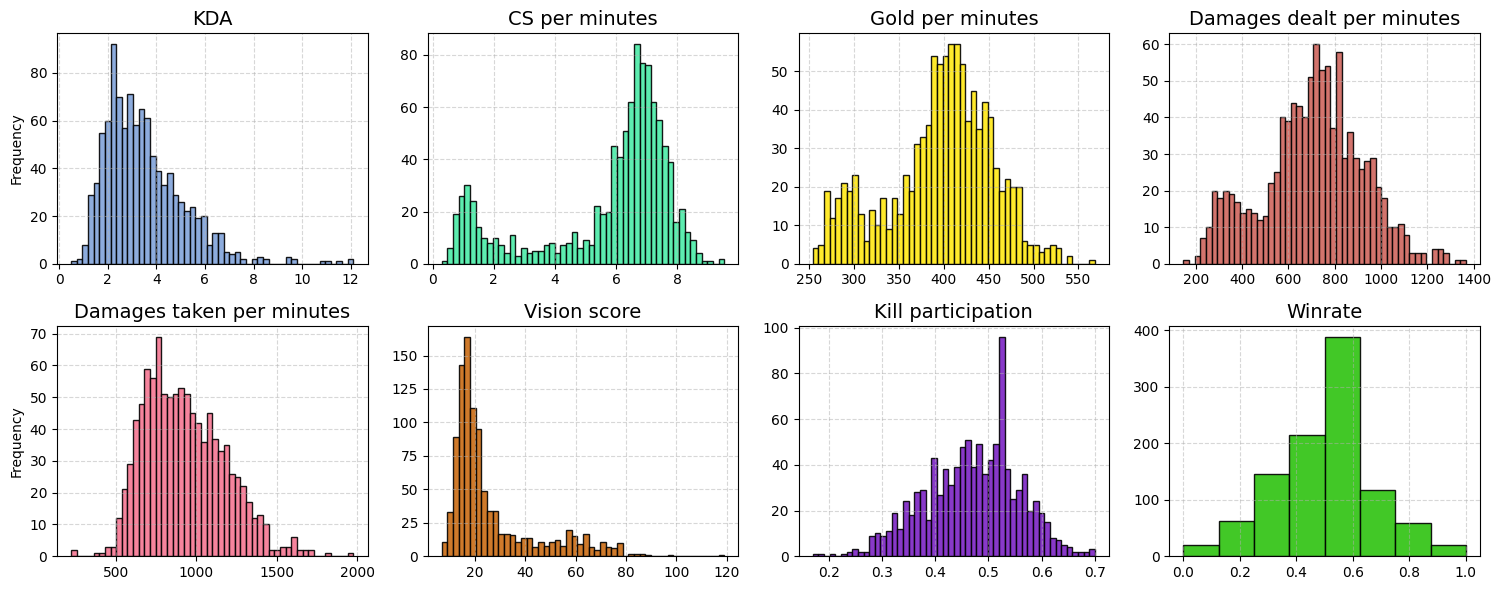

In [36]:
bins = 50
kda_players = data_matrix[0,:]
cs_players = data_matrix[1,:]
gold_players = data_matrix[2,:]
dmg_players = data_matrix[3,:]
dmg_taken_players = data_matrix[4,:]
vision_score_players = data_matrix[5,:]
kp_players = data_matrix[6,:]
winrate_players = data_matrix[7,:]


fig, axs = plt.subplots(2, 4, figsize=(15, 6))  # 1 ligne, 2 colonnes

# KDA
axs[0,0].hist(kda_players, bins=50, color="#81A3DA", edgecolor='black', alpha=0.9)
axs[0,0].set_title("KDA", fontsize=14)
axs[0,0].set_ylabel("Frequency")
axs[0,0].grid(True, linestyle='--', alpha=0.5)

# CS/min
axs[0,1].hist(cs_players, bins=50, color="#4BEBA8", edgecolor='black', alpha=0.9)
axs[0,1].set_title("CS per minutes", fontsize=14)
axs[0,1].grid(True, linestyle='--', alpha=0.5)

# Gold/min
axs[0,2].hist(gold_players, bins=50, color="#FFE815", edgecolor='black', alpha=0.9)
axs[0,2].set_title("Gold per minutes", fontsize=14)
axs[0,2].grid(True, linestyle='--', alpha=0.5)

# Damage
axs[0,3].hist(dmg_players, bins=50, color="#CF655D", edgecolor='black', alpha=0.9)
axs[0,3].set_title("Damages dealt per minutes", fontsize=14)
axs[0,3].grid(True, linestyle='--', alpha=0.5)

# Damage taken
axs[1,0].hist(dmg_taken_players, bins=50, color="#F57792", edgecolor='black', alpha=0.9)
axs[1,0].set_title("Damages taken per minutes", fontsize=14)
axs[1,0].grid(True, linestyle='--', alpha=0.5)
axs[1,0].set_ylabel("Frequency")

# Vision score
axs[1,1].hist(vision_score_players, bins=50, color="#CA6C14", edgecolor='black', alpha=0.9)
axs[1,1].set_title("Vision score", fontsize=14)
axs[1,1].grid(True, linestyle='--', alpha=0.5)

# Kill participation
axs[1,2].hist(kp_players, bins=50, color="#7B23C4", edgecolor='black', alpha=0.9)
axs[1,2].set_title("Kill participation", fontsize=14)
axs[1,2].grid(True, linestyle='--', alpha=0.5)

# Winrate
axs[1,3].hist(winrate_players, bins=8, color="#2DC20F", edgecolor='black', alpha=0.9)
axs[1,3].set_title("Winrate", fontsize=14)
axs[1,3].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### II. Machine Learning 
Now that we have our dataset ready, the second goal is to use machine learning in order to :
- Identify different profiles of player, which means using clustering methods (K-means, EM, etc..) in order to identify labels
- Train a model in order to predict  the class of a new player

#### 1. K-mean 